# Predicting Angiographic Disease Status

# Introduction
With the advent of globalisation, we have seen an exponential improvement in the quality of life for people globally. Inventions from plastics and the internet have revolutionised the way human society functions. With globalisation, we saw both industrialisation and innovations in food technology. But, like everything, this has positively and negatively impacted human life. 

In our modern times, we have witnessed exorbitant increases in the prevalence rates of diseases fueled by unhealthy lifestyles, which have long-lasting effects on people's lives.

Angiographic disease refers to a condition which is associated with blood vessels and blood flow through these vessels. With this project, we are analysing the *processed.cleveland.data* file and using the data to predict the type of chest pain an individual has in the event the individual is sick.

Chest pains are classified into the four following types:
1. Typical angina
2. Atypical angina
3. Non-anginal pain
4. Asymptomatic

# Preliminary Exploratory Data Analysis

In [22]:
# Importing Necessary Libraries
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)


# To make the code cleaner to easy to read
options(repr.matrix.max.rows = 6)

In [23]:
# Loadind Data
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
heart_disease_data <- read_csv(url, 
                               col_names = FALSE)

# Covering Data Frame To Tibble
heart_disease_data <- as_tibble(heart_disease_data)

# Checking Data
heart_disease_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [24]:
# Preprocessing Of Data
heart_disease_data <-   heart_disease_data |>
                        mutate(X2  = as.factor(X2) ,
                               X3  = as.factor(X3) ,
                               X6  = as.factor(X6) ,
                               X7  = as.factor(X7) ,
                               X9  = as.factor(X9) ,
                               X11 = as.factor(X11),
                               X12 = as.factor(X12),
                               X13 = as.factor(X13),
                               X14 = as.factor(X14))

# Renaming Columns
names <- c("age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num")
colnames(heart_disease_data) <- make.names(names)

In [25]:
#Showing row count for each chest pain type
num_obs <- nrow(heart_disease_data)
heart_disease_data |>
slice(1:302) |>
  group_by(cp) |>
  summarize(
    count = n(),
    percentage = n() / num_obs * 100)

cp,count,percentage
<fct>,<int>,<dbl>
1,23,7.590759
2,50,16.501650
3,85,28.052805
4,144,47.524752


As the data distribution is uneven in this training set, the model will prefer 4 and the prediction will be inaccurate. Therefore, we will cut the data to ensure even distrubution in our training set.

In [37]:
#Getting a random number of rows (between 20-30) with cp 4
set.seed(45768)
random <- runif(1,20,30)
random_number <- round(random, 0)
random <- sample(20-30)
even_4 <- heart_disease_data |>
filter(cp == 4) |>
group_by(cp) |>
slice(1:random_number)

In [38]:
#Getting a random number of rows (between 20-30) with cp 3
set.seed(457681)
random <- runif(1,20,30)
random_number <- round(random, 0)
random <- sample(20-30)
even_3 <- heart_disease_data |>
filter(cp == 3) |>
group_by(cp) |>
slice(1:random_number)

In [39]:
#Getting a random number of rows (between 20-30) with cp 2
set.seed(457682)
random <- runif(1,20,30)
random_number <- round(random, 0)
random <- sample(20-30)
even_2 <- heart_disease_data |>
filter(cp == 2) |>
group_by(cp) |>
slice(1:random_number)

In [42]:
#Getting a random number of rows (between 20-30) with cp 1 and combining the other even data sets.
even_data <- heart_disease_data |>
filter(cp == 1) |>
rbind(even_4, even_2, even_3)
even_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
64,1,1,110,211,0,2,144,1,1.8,2,0.0,3.0,0
58,0,1,150,283,1,2,162,0,1.0,1,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
46,0,3,142,177,0,2,160,1,1.4,3,0.0,3.0,0
54,0,3,135,304,1,0,170,0,0.0,1,0.0,3.0,0
60,1,3,140,185,0,2,155,0,3.0,2,0.0,3.0,1


In [36]:
#row distribution for even data
num_obs <- nrow(even_data)
even_data |>
  group_by(cp) |>
  summarize(
    count = n(),
    percentage = n() / num_obs * 100)

cp,count,percentage
<fct>,<int>,<dbl>
1,23,25.84270
2,24,26.96629
3,21,23.59551
4,21,23.59551


Now the row distribution is even.

In [31]:
#Splitting
set.seed(45768)
heart_disease_data_split<-initial_split(even_data,prop=.75,strata="num")
training_data<-training(heart_disease_data_split)
testing_data<-testing(heart_disease_data_split)

In [32]:
#Mean of double training data
training_data_double<-select(training_data,-sex,-cp,-fbs,-restecg,-exang,-slope,-ca,-thal,-num)

training_data_table<-training_data_double|>
                            map_df(mean)|>
                            map_df(as.integer)
training_data_table

age,trestbps,chol,thalach,oldpeak
<int>,<int>,<int>,<int>,<int>
54,134,243,154,1


In [69]:
training_data_factor<-training_data|>
        select(-age,-trestbps,-chol,-thalach,-oldpeak)
        
                        
p = ggplot(training_data_factor, aes(x=sex)) +
    geom_histogram(stat="count")
p<-facet_grid(training_data_factor,cols=cp)

ggsave("hist.png", p, height=4, width=6, dpi=150)
p

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


ERROR: Error in facet_grid(training_data_factor, cols = cp): object 'cp' not found


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


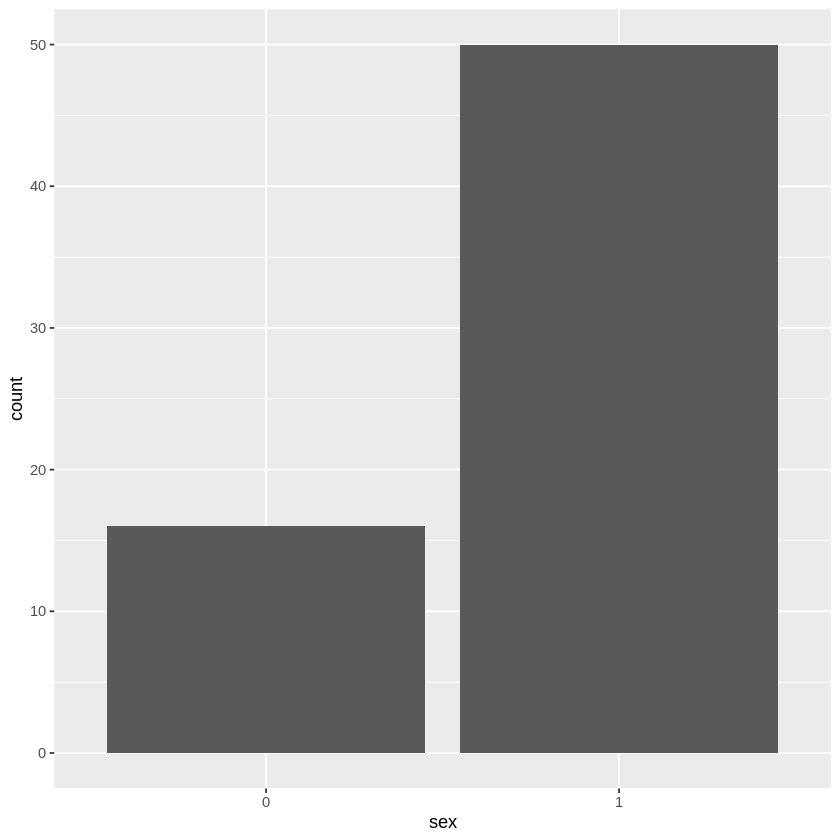

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'restcg' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.default(obj)
8. paste(capture.output(print(

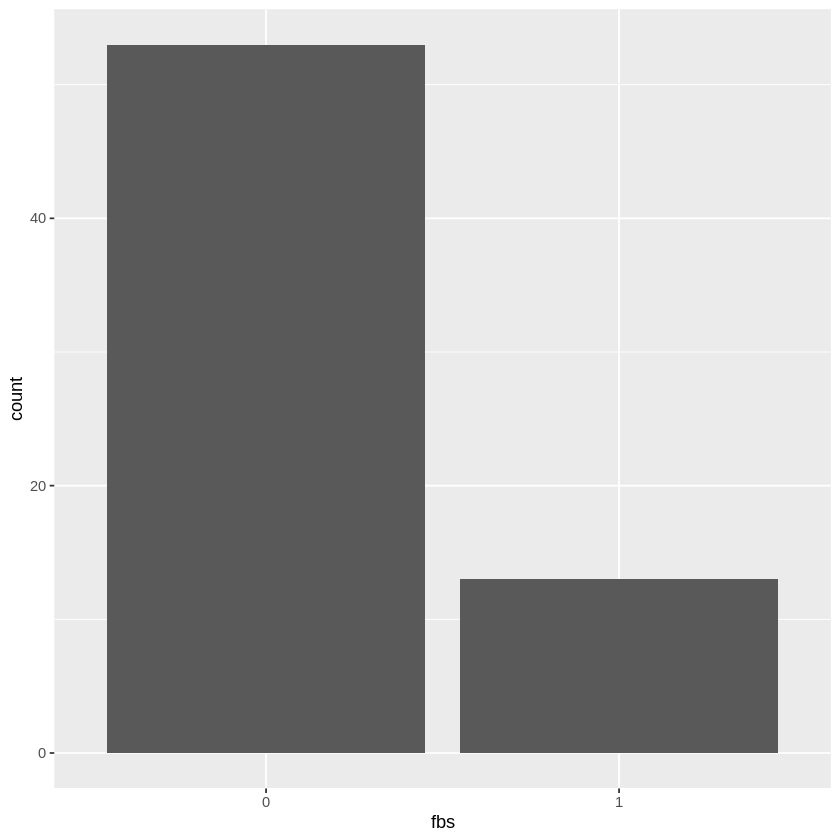

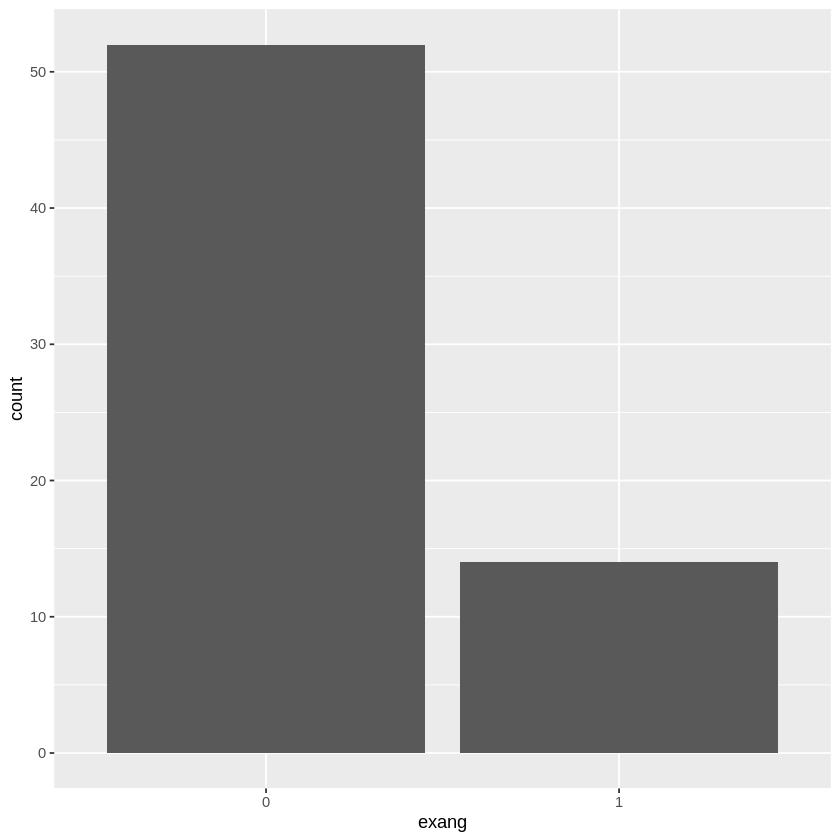

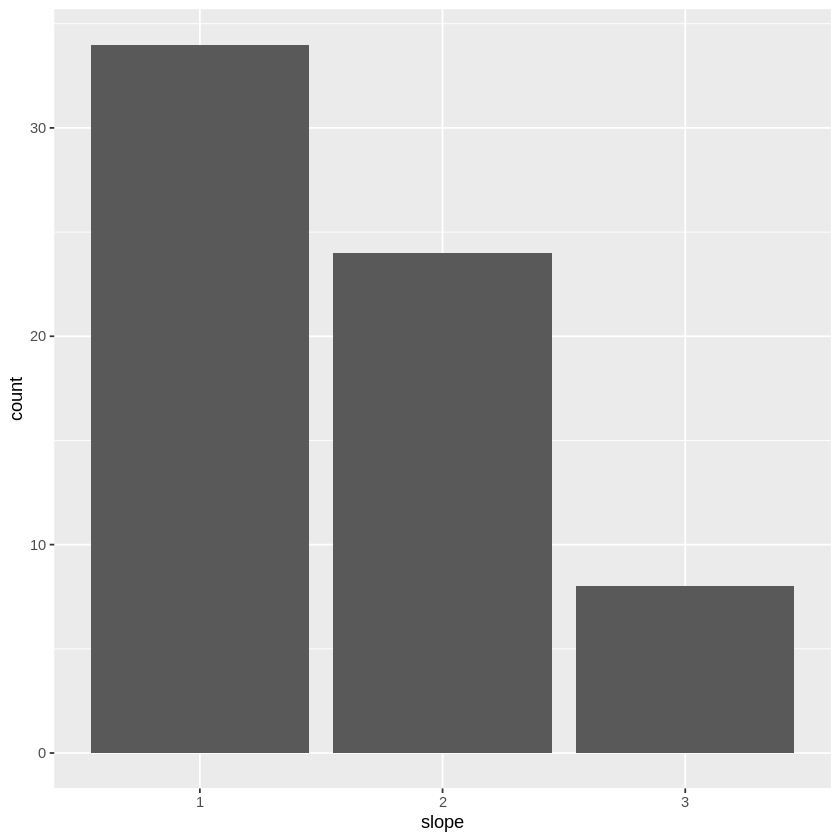

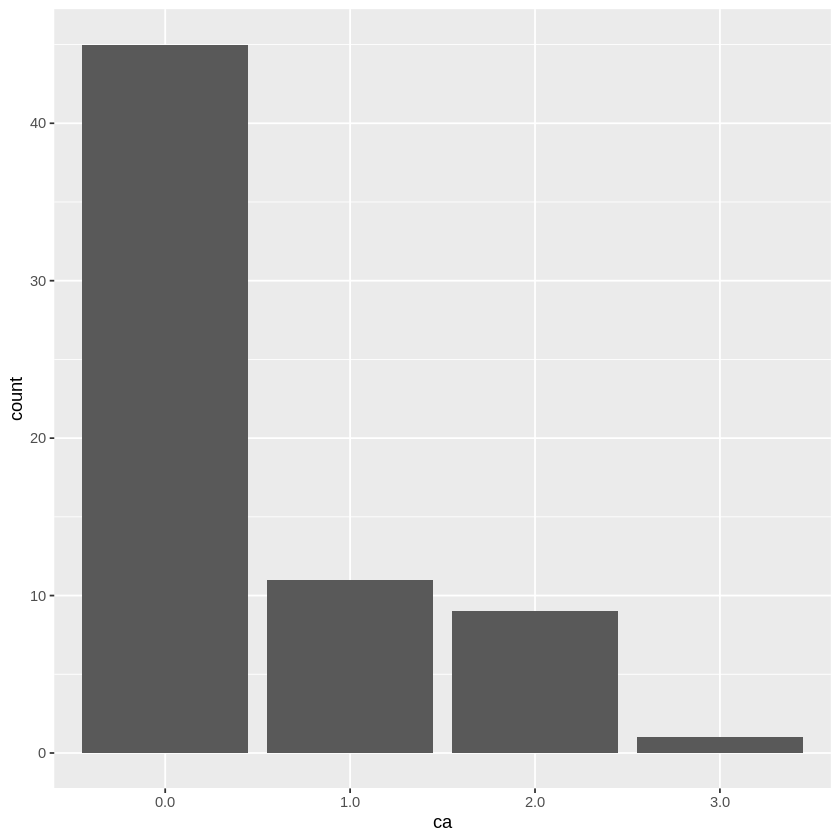

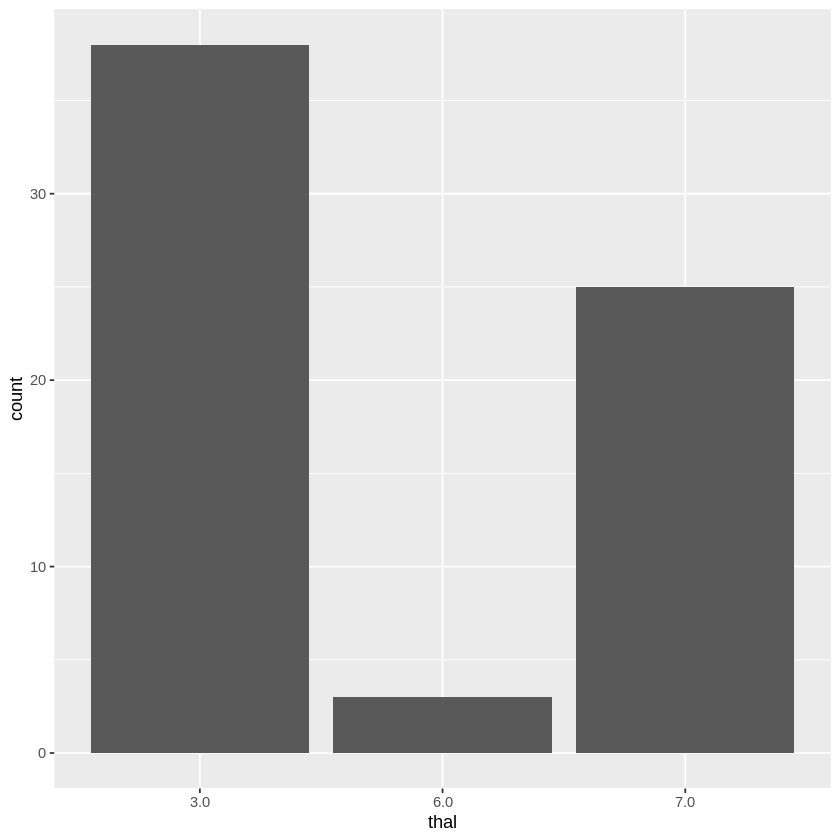

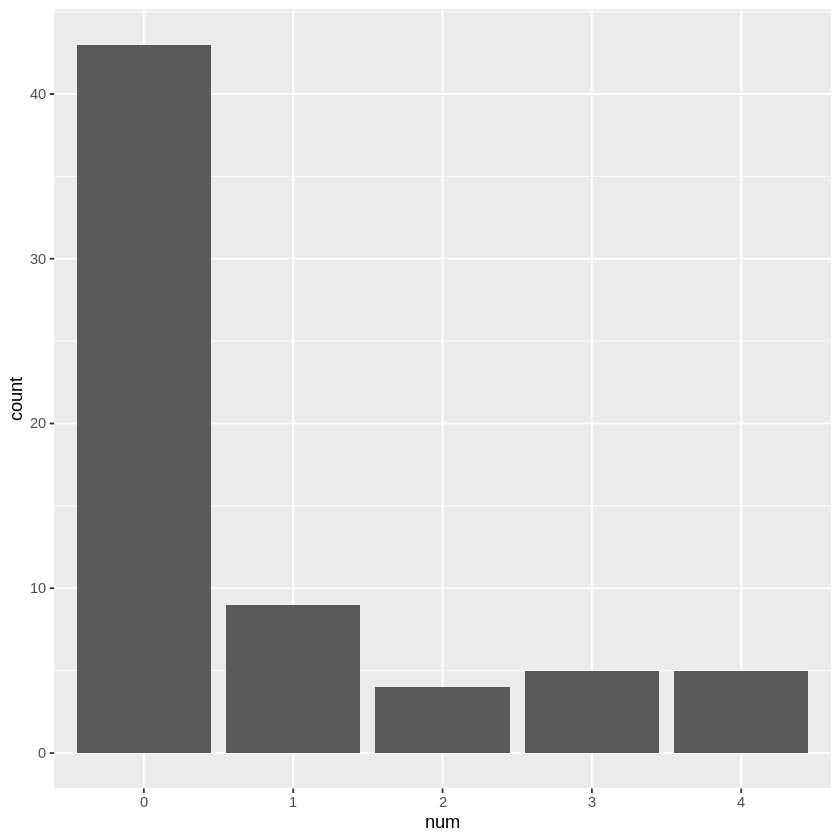

In [47]:
options(repr.plot.width = 7, repr.plot.height = 7)
plot1<-ggplot(training_data, aes(x=sex))+
            geom_histogram(stat="count")
plot2<-ggplot(training_data, aes(x=fbs))+
            geom_histogram(stat="count")
plot3<-ggplot(training_data, aes(x=restcg))+
            geom_histogram(stat="count")
plot4<-ggplot(training_data, aes(x=exang))+
            geom_histogram(stat="count")
plot5<-ggplot(training_data, aes(x=slope))+
            geom_histogram(stat="count")
plot6<-ggplot(training_data, aes(x=ca))+
            geom_histogram(stat="count")
plot7<-ggplot(training_data, aes(x=thal))+
            geom_histogram(stat="count")
plot8<-ggplot(training_data, aes(x=num))+
            geom_histogram(stat="count")
plot1
plot2
plot3
plot4
plot5
plot6
plot7
plot8

# Methods

1. The first step in the data analysis was to tidy up the data. For instance, the data didn't have any labels in it so we used the colnames() function to rename the default labels to human readable values.
 2. The next step includes splitting the data into training and testing data sets so that we can make a prediction model.
 3. We needed a recipe to create a prediction model for our analysis but before creating the recipe, we instead performed the cross-validation operation to break up the training set into pieces and then predict the model using tuned neighbours. Following this, we plotted the neighbours versus mean graph and from the confmat and metrics function output to vizualize the best value of K.
 4. We used the value of K we got to create the final recipe and add it to our prediction model. We found the best value of K to be  , giving us an accuracy of _%.
 5. We then trained our model using the workflow function and then predicted the data in the testing set using our model.
 6. We have included all the variables present in the training set since we felt that all of them were affecting the result of the type of chest pain.
 
 We're vizualizing the neighbours versus mean line plot from the output we got from the metrics and the conf_mat functions. We used this vizualization to predict the best value of K. The plot clearly described how the mean of the accuracy was changing with change in the value of K.

## Expectations and Outcomes
We're expecting to predict the type of chest pain that a person might have based on the symptoms and the health condition of the person. We're using various factors such as age, sex, blood sugar level, etc. to predict the type of chest pain. 

Our model can help with a faster detection of the type of chest pain and hence a proper treatment can be given to a person in time. The model can also be used to study how the type of chest pain varies with different factors and doctors and scientists would be able to get more information about the same.

This could lead to discovering a new type of chest pain that our model might not be able to predict. We can also study the data more and predict some additional symptoms of a particular type of chest pain.

# Glossary
To help keep track of the terms that may be ambigious to the reader, we have add a glossary so that you can quickly check what different terms mean.

X1. (age)

X2. (sex)\
(1 = male; 0 = female)

X3. (cp)\
(chest pain type)
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic

X4. (trestbps)\
resting blood pressure (in mm Hg on admission to the hospital)

X5. (chol)\
serum cholestoral in mg/dl

X6. (fbs)\
(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

X7. (restecg)\
 resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

X8. (thalach)\
maximum heart rate achieved

X9. (exang)\
exercise induced angina (1 = yes; 0 = no)

X10. (oldpeak)\
ST depression induced by exercise relative to rest

X11. (slope)\
the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping

X12. (ca)\
number of major vessels (0-3) colored by flourosopy

X13. (thal)\
3 = normal; 6 = fixed defect; 7 = reversable defect

X14. (num) (the predicted attribute)\
diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing
(in any major vessel: attributes 59 through 68 are vessels)